In [1]:
import numpy as np
import utils
from utils import *
import itertools
import random
from numpy import linalg as LA
import math

def create_vector(a,b,step):
    new_vec = []
    curr_val = a
    while curr_val < b:
        new_vec.append(curr_val)
        curr_val += step
        
    return new_vec

In [2]:
folder_name = "../Toroidal_topology_grid_cell_data/"

In [3]:
a = np.load("../Toroidal_topology_grid_cell_data/rat_r_day1_grid_modules_1_2_3.npz",allow_pickle=True)

In [4]:
a.files

['spikes_mod1', 'spikes_mod2', 'spikes_mod3', 'x', 'y', 't', 'z', 'azimuth']

In [5]:
a['x']

array([-0.47897512, -0.47518063, -0.47168648, ...,  0.4646765 ,
        0.4671132 ,  0.46969566], dtype=float32)

In [6]:
d = dict(zip((str(k) for k in a), (a[k] for k in a)))

In [7]:
d.keys()

dict_keys(['spikes_mod1', 'spikes_mod2', 'spikes_mod3', 'x', 'y', 't', 'z', 'azimuth'])

In [8]:
d['spikes_mod1'].item()

{0: array([ 7457.5409    ,  7458.01693333,  7458.14456667, ...,
        21626.1872    , 21631.8351    , 21633.5363    ]),
 1: array([ 7459.24686667,  7459.9919    ,  7460.00466667, ...,
        21597.61323333, 21619.25986667, 21622.67153333]),
 2: array([ 7458.6629    ,  7463.00626667,  7470.1531    , ...,
        21631.17483333, 21631.29813333, 21631.82373333]),
 3: array([ 7457.1354    ,  7457.36046667,  7458.14426667, ...,
        21631.40226667, 21637.00676667, 21637.24873333]),
 4: array([ 7461.43973333,  7464.32866667,  7465.59683333, ...,
        21616.4406    , 21627.55033333, 21633.09443333]),
 5: array([ 7464.82396667,  7465.07326667,  7465.60643333, ...,
        21606.93136667, 21608.37666667, 21610.4704    ]),
 6: array([ 7457.04083333,  7457.9092    ,  7458.25123333, ...,
        21639.48246667, 21639.73516667, 21639.74136667]),
 7: array([ 7457.9004    ,  7458.02946667,  7460.72886667, ...,
        21638.57173333, 21639.35616667, 21639.61983333]),
 8: array([ 7457.906    

In [9]:
d['spikes_mod1'].item().keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165])

In [10]:
d['spikes_mod2'].item().keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167])

In [11]:
d['spikes_mod3'].item().keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148])

In [12]:
len(d['spikes_mod1'].item()[3])

35101

In [13]:
total = 0
for key, val in d['spikes_mod1'].item().items():
    total += len(val)
for key, val in d['spikes_mod2'].item().items():
    total += len(val)
for key, val in d['spikes_mod3'].item().items():
    total += len(val)

print(total)
#d['spikes_mod2'].item()

16849310


In [14]:
len(d['x'])

1418299

In [15]:
d['x']

array([-0.47897512, -0.47518063, -0.47168648, ...,  0.4646765 ,
        0.4671132 ,  0.46969566], dtype=float32)

In [16]:
d['y']

array([-0.54703695, -0.5431891 , -0.53941685, ..., -0.72706604,
       -0.72636205, -0.7252686 ], dtype=float32)

In [17]:
d['t']

array([ 7457.01,  7457.02,  7457.03, ..., 21639.97, 21639.98, 21639.99])

In [18]:
d['t']

array([ 7457.01,  7457.02,  7457.03, ..., 21639.97, 21639.98, 21639.99])

In [19]:
len(d['z'])

1418299

In [20]:
len(d['azimuth'])

1418299

In [21]:
rat_name = 'R'
mod_name = '2'
sess_name = 'OF'
day_name = 'day1'

In [22]:
#spikes_bin, xx, yy, aa, tt = get_spikes(rat_name, mod_name, day_name, sess_name, bSmooth = True, bSpeed = True, folder = "Toroidal_topology_grid_cell_data/")

In [23]:
#spikes_bin.shape

In [24]:
#spikes_bin[0]

In [25]:
#xx.shape

In [26]:
#yy.shape

In [27]:
#aa.shape

In [28]:
#tt.shape

In [29]:
load_pos("r", "OF", day_name = 'day1', bSpeed = False, folder = folder_name)

(array([-0.47897512, -0.47707787, -0.47518063, ...,  0.68280774,
         0.6830079 ,  0.68310376]),
 array([-0.54703695, -0.54511303, -0.54318911, ..., -0.35497057,
        -0.35531771, -0.35541726]),
 array([0.22731559, 0.22831983, 0.22932407, ..., 0.72156394, 0.72580314,
        0.72696052]),
 array([ 7457.  ,  7457.01,  7457.02, ..., 16044.97, 16044.98, 16044.99]))

In [30]:
tens = [10,20,30,40,50,60,70,80,90,100,110,120,130,140]
alpha_all = np.zeros((len(tens), 100))

rat_name = 'R'
mod_name = '2'
sess_name = 'OF'
day_name = 'day1'

nums = 3
angs = np.zeros((len(tens), nums))
xlen = np.zeros((len(tens), nums))
ylen = np.zeros((len(tens), nums))
score1 = np.zeros((len(tens), nums))
score2 = np.zeros((len(tens), nums))
nn = -1
dim = 6
ph_classes = [0,1] # Decode the ith most persistent cohomology class
num_circ = len(ph_classes)
dec_tresh = 0.99
metric = 'cosine'
maxdim = 1
coeff = 47
active_times = 15000
k = 1000
num_times = 5
n_points = 1200
nbs = 800

sspikes_all, xx, yy = get_spikes(rat_name, mod_name, day_name, sess_name, bType = 'pure',
                                 bSmooth = True, bSpeed = True, folder = folder_name)[:3]
spikes_all = get_spikes(rat_name, mod_name, day_name, sess_name, bType = 'pure', bSmooth = False, bSpeed = True, folder = folder_name)[0]


In [31]:
spikes_all.shape

(766731, 149)

In [32]:
spikes_all.shape

(766731, 149)

In [33]:
xx.shape

(766731,)

In [34]:
yy.shape

(766731,)

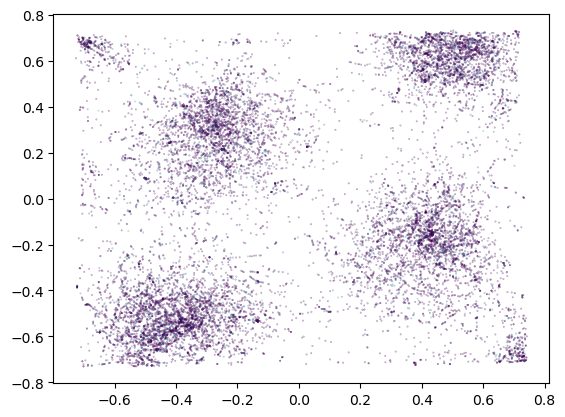

In [35]:
k = 17

indices = spikes_all[:,k] > 0
plt.scatter(xx[indices], yy[indices], s=0.1, c=spikes_all[indices,k], alpha=0.5)
plt.show()

A mouse moves in a time series: 

$$f : \mathbb R \rightarrow \mathbb R, \mathbb R, \mathbb R^{149}$$
$$t \rightarrow x, y, spikes$$

Assumption: this curve $f$ is space filling in $[-0.75, 0.75]^2$. We can transform: 

$$f \rightarrow g : \mathbb R^2 \rightarrow \mathbb R^{149}$$

We want to learn a function $h$ such that 

$$h : \mathbb R^{149} \rightarrow \{ \text{what is the mouse doing} \} $$

In [38]:
min_x = min(xx)
max_x = max(xx)

min_y = min(yy)
max_y = max(yy)

X = create_vector(min_x, max_x, 0.05)
Y = create_vector(min_y, max_y, 0.05)

X_,Y_ = np.meshgrid(X,Y)

Z = np.zeros(X_.shape)
for t in range(766731):
    if spikes_all[t,17] > 0: 
        for i, x_new in enumerate(X):
            for j, y_new in enumerate(Y):
                Z[i][j] += spikes_all[t,17] * np.exp(-20 * np.sqrt((xx[t] - x_new) ** 2 + (yy[t] - y_new) ** 2) ) / np.sqrt(2 * math.pi)

<IPython.core.display.Javascript object>


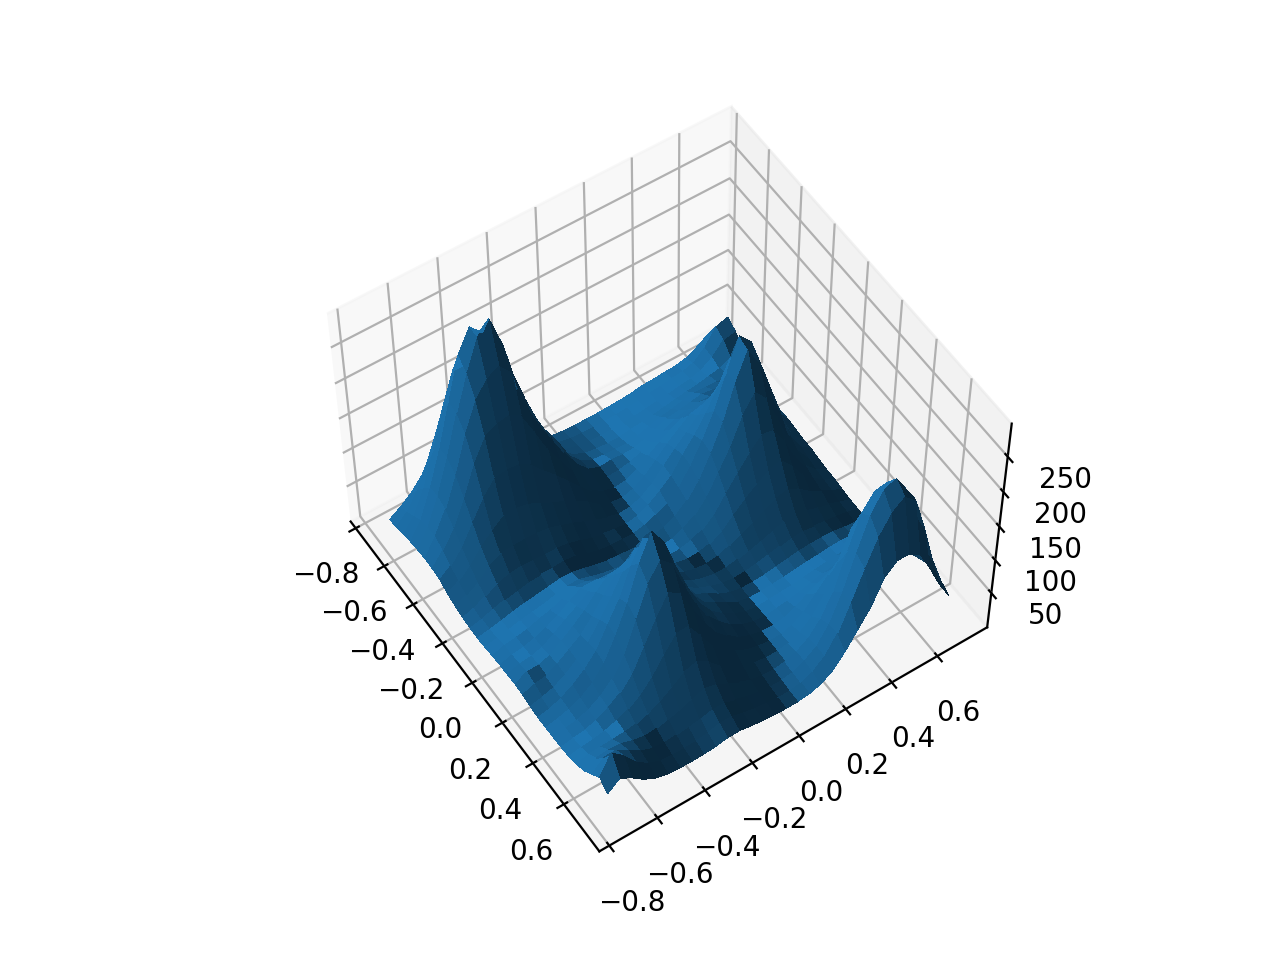

In [41]:
%matplotlib notebook
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X_, Y_, Z,linewidth=0, antialiased=False)